In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

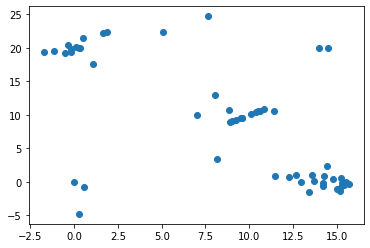

In [2]:
np.random.seed(3202)

d=np.random.multivariate_normal([14,0], [[1,0],[0,1]],20)
d2=np.random.multivariate_normal([0,20], [[1,.8],[.8,1]],12)
d3=np.random.multivariate_normal([10,10], [[1,1],[1,1]],12)
d4=[[14,20], [0,0], [7,10]]
d5={'x': np.random.random(size=10)*(20)-3, 'y': np.random.random(size=10)*30-5}
df=pd.DataFrame(data=d, columns=['x','y'])
df = df.append(pd.DataFrame(data=d2, columns=['x','y']))
df = df.append(pd.DataFrame(data=d3, columns=['x','y']))
df = df.append(pd.DataFrame(data=d4, columns=['x','y']))
df = df.append(pd.DataFrame(data=d5, columns=['x','y']))
plt.scatter(df['x'],df['y'])

In [3]:
print(df.index)
print(len(df))
  
df = df.reset_index(drop = True)
print(df)

#I realized that the index of the dataframe had not been changed as data was being generated:
#d=np.random.multivariate_normal([14,0], [[1,0],[0,1]],20) is indexed 0-19
#d2=np.random.multivariate_normal([0,20], [[1,.8],[.8,1]],12) is indexed 0-11
#d3=np.random.multivariate_normal([10,10], [[1,1],[1,1]],12) is indexed 0-11 and so on and so forth.
#this meant that the idx of the dataframe would go from 0-19 to 0-11 instead of chronologically all the way to 56
#so for the sake of my sanity and ocd, I reset the index from 0-56 so that I could keep track of indeces of points.

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,
             2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  0,  1,  2,  3,
             4,  5,  6,  7,  8,  9],
           dtype='int64')
57
            x          y
0   12.668056   1.007064
1   15.389106  -0.502273
2   14.206290  -0.150340
3   13.726624   0.111160
4   15.305368  -0.196049
5   14.763910   0.446853
6   11.458259   0.931462
7   15.185711  -0.843389
8   12.280708   0.775716
9   12.968540   0.037962
10  13.564273   0.970785
11  15.235982   0.578433
12  14.990878  -1.050833
13  15.188518  -1.418438
14  14.450525   2.384275
15  15.521451  -0.088087
16  14.259718   0.952237
17  15.675474  -0.352312
18  13.412437  -1.446549
19  14.210589  -0.569711
20  -0.185838  19.328680
21   0.125472  20.094573
22  -0.178748  19.775577
23  -1.140249  19.481515
24  -1.717893  19.397538
25   0.514302  21.500275
26   0.342375  20.0

In [4]:
from sklearn.neighbors import NearestNeighbors
import math 

def distance_points(p1, p2): #distance function takes 2 points and calculates the euclidean distance
    x1, y1 = p1 #separate x- y coordinates from each point
    x2, y2 = p2
    dist = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2) #formula for distance
    return dist

nbrs = NearestNeighbors(n_neighbors = 3, metric = distance_points).fit(df) #nearestneighors finds 2 nearest points to given point
distance, indices = nbrs.kneighbors(df) #split our data to be organized

#[ 0  8 10] example output of the 2 nearest points to the first point indexed by 0 given by indices
#[0 0.45117683 0.896950] example output of the distance of the nearest points from the first point given by distance

x_coor = []
y_coor = []
coor = []

vertex = indices[:, 0] #I split the array of the first index of nodes and named it vertex

edge1 = indices[:, 1] #this is the array of the closest node #1 to the vertex nodes

dist1 = distance[:, 1] #this is the array of the distances between vertex node and node#1

edge2 = indices[:, 2] #this is the array of the closest node #2 to the vertex nodes

dist2 = distance[:, 2] #this is the array of the distances between vertex node and node#2

for i in range(len(df)): #i split my dataframe into x_cooridants and y_cooridants 
    x_coor.append(df.iloc[i,0]) #df iloc[i, 0]  gets the first column
    y_coor.append(df.iloc[i,1]) #df iloc[i, 1] gets the second column
    coor.append([df.iloc[i,0], df.iloc[i,1]])

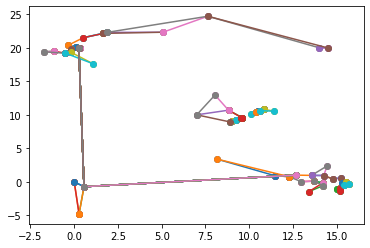

In [5]:
def add_edge(x_coor, y_coor, p1, p2): #given the split i performed above, i input 2 points 
    x1, x2 = x_coor[p1], x_coor[p2] #then each x is extracted from each point
    y1, y2 = y_coor[p1], y_coor[p2] #then each y is extracted from each point
    plt.plot([x1,x2], [y1,y2], '-o') #connect the two points: add the edge

for i in range(0, 57): #loop through all the vertices 
    add_edge(x_coor, y_coor, vertex[i], edge1[i]) # add edge between vertex node and first closest point
    add_edge(x_coor, y_coor, vertex[i], edge2[i]) # add edge between vertex node and second closest point
    add_edge(x_coor, y_coor, vertex[0], edge1[45]) #extra hardcoded edges
    add_edge(x_coor, y_coor, vertex[29], edge1[45]) #extra hardcoded edges

In [6]:
#add edges
#create edge dictionary?
#create path function?

#do A*
#print path

path = [0, 1, 2] #to check if the distance between nodes indexed 0 to 1 to 2 are being totalled correctly

def total_distance(path):
    sum_dist = 0 
    for i in range(len(path) - 1): #iterate through every node in the path
        sum_dist += distance_points(coor[path[i]], coor[path[i+1]]) #calculate the sum of distance between first node and second
    return sum_dist #return the sum of all distances between the two points
 
total_distance(path) #checked and returns correctly

4.345687094917326

[0, 8, 6, 9, 3, 2, 19, 12, 7, 1, 4, 15, 17, 11, 5, 16, 10, 14, 13, 18, 50, 42, 41, 36, 43, 34, 35, 33, 37, 40, 39, 32, 38, 47, 48, 46, 49, 52, 20, 31, 22, 21, 29, 26, 30, 23, 24, 25, 28, 27, 51, 54, 44, 56, 45, 55, 53]


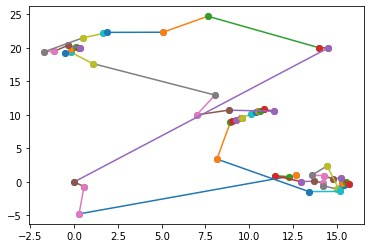

In [7]:
#lowest edge length
#hits each vertex once
#travel directly between any two cities

import random


#I will be using the greedy algorithm to find the path list of the traveling salesman:
    #where each city will be hit once depending on the closest/shortest distance- nearest neighbor in other words.
    
    
def greedy(vertex, start):
    
    if start == None: #if start city is not defined
        C = random.randrange(len(vertex)) # we will look for a random start city
    else:
        C = start #if start city is given, use that city
        tour = [C] #we will keep track of our path that I named tour, add starting city to the tour.
    
    unvisited = list(range(len(vertex))) #we will create a list of unvisited cities
    
    unvisited.remove(C) #remove c from our unvisited cities- since we are starting in that city.
                        #this is the same as marking a city as visited
        
    while(unvisited): #we will hit each city at least once- every city will be visited
        C = nearest_neighbor(C, unvisited) #use the nearest neighbor function where we find the minimum distance(see below)
        tour.append(C) #we have to mark the next city as visited by adding it to the tour
        unvisited.remove(C) #and removing it from our unvisited list
     
    return(tour) #we will return the order of our visited cities

def nearest_neighbor(A, vertex):
    return(min(vertex, key = lambda C: distance_points(coor[C], coor[A]))) #find min dist between 2 coordinates, city C and city A: we use our distance between 2 points here as well
    
a = greedy(vertex, 0) #testing my function with starting vertex of 0
print(a) #printing the path it outputs

for i in range(0, 57): #loop through all the vertices 
    add_edge(x_coor, y_coor, a[i-1], a[i]) #add all the edges of the tour we found using our greedy method

I implemented the temperature and probability functions from our lecture notebook. Where temperature is a schedule function calculated as temperature = constant/ (time + 1) ** probability implemented in the cell below. I set lecture examples as constant c and p as long as they are not defined for an initial implementation. If we define a c and p, we can see the different affects of our temp and probabilities when we decide to maybe accept a worse_state in the case a worse_state exists compared to our current_state. 

In [8]:
#From the class notebooks, I took the temperature schedule function- the typical schedule choice
#we have a temperature updating schedule, which defines how we accept or reject proposed paths
#accept wackier solutions with lower and lower probability! 

def schedule(time, c = None, p = None): #time is just the same thing as # of iterations where our candidate changes per iteration
    
    if (c== None and p == None): #if we dont define c or p we will go ahead with lecture implementations.
        c = 20#
        p = 0.7#
        
    else: #otherwise we will define in problem statement for comparison
        c = c
        p = p
    temperature = c/(time + 1) ** p #how we should be cooling off-controls how much we are allowed to move around
                                    #as T increases, the denominator gets large and temp approaches 0
    return temperature

In [9]:
#I want to take all my coordinates that I organized from the dataframe and create a distance matrix out of it. 
def dist_matrix(vertex):
    coor = np.array(vertex) #convert coordinates to an array 
    matrix = np.sqrt((np.square(coor[:, np.newaxis] - coor).sum(axis = 2))) #euclidean distance across rows of array
    return matrix

matrix = dist_matrix(coor)

#results was to make sure that I didn't mess anything up in terms of my dist_matrix
results = greedy(matrix, 0)

#print(matrix) #output of distance matrix
print(results)#output was the same as above so I went ahead to annealing

[0, 8, 6, 9, 3, 2, 19, 12, 7, 1, 4, 15, 17, 11, 5, 16, 10, 14, 13, 18, 50, 42, 41, 36, 43, 34, 35, 33, 37, 40, 39, 32, 38, 47, 48, 46, 49, 52, 20, 31, 22, 21, 29, 26, 30, 23, 24, 25, 28, 27, 51, 54, 44, 56, 45, 55, 53]


In [10]:
class sim_anneal: #create a sim_anneal class like we did in the annealing notebook but I wanted to add some methods
                  #that I could manipulate, so that I could see my results & plot accordingly 
                  #I already excluded the helper functions defined above including:
                            #add_edge, total_distance, distance_points, greedy, dist_matrix, schedule
    
    def __init__(self, coor, n_iter, c = None, p = None):
        
        self.c = c #schedule func constant
        
        self.p = p #schedule func probability
        
        self.coor = coor #array of coordinates of cities
    
        self.n_iter = n_iter #iteration to terminate annealing process
        
        self.n = len(coor) #our sample space
    
        self.dist_matrix = dist_matrix(coor) #convert our coordinates to the distance matrix using func above
        self.curr_state = greedy(dist_matrix(coor), 0) #find the greedy path of the distance matrix - shortest path
        self.best_state = self.curr_state #initialize best_state as curr_state
        
        
        self.dist_list = [] #create a list to save all of our generated distances
        
        self.curr_path = total_distance(self.curr_state) #use total_distance func of our curr_state to calculate the distance of our curr path
        self.init_path = self.curr_path #initialize our inital path or our first path to be our current path
        self.min_path = self.curr_path #initialize our minimum distance path as our current path
    
    def anneal(self, c = None, p = None): #this is where we will be annealing taken from the class notebooks and modified
        
        for t in range(self.n_iter): #run a for loop that takes a whole bunch of steps
            
            possibleNext = list(self.curr_state) #possible next moves is the list of our curr_state
            
            temp = schedule(t, c, p) #check the temperature of our next_moves at wherever our curr_time is
            
            #compute our nextMove and nextValues: in my case I found a 2-opt optimization for TSP:
                        #http://pedrohfsd.com/2017/08/09/2opt-part1.html
                        #where inversions are made to make improvements
            
            j = random.randint(2, self.n - 1)
            i = random.randint(0, self.n - j)
            
            possibleNext[i : (i + j)] = reversed(possibleNext[i: (i + j)])            
                        
            next_path = total_distance(possibleNext) #calculate the path of our inversed state- nextmove/nextvalues
            
            #given our solution, annealing will accept the one with shorter path cost 
            #if new state is better than old state than we should always accept
            if next_path < self.curr_path: #if our new_state or next_path shorter than our curr_path
                self.curr_path = next_path  #update values
                self.curr_state = possibleNext
            
                if next_path < self.min_path: #update min and best state
                    self.min_path = next_path
                    self.best_state = possibleNext
        
            else: #if not better, than maybe accept, determined by our p_accept function
                p_accept = np.exp(-abs (next_path - self.curr_path) / temp) 
                         #less than 1 when delta E is neg: we don't always want to accept states that are worse
                         #than where we started
                         #gets closer and closer to 0 as we increment through for loop
                            
                #sample a random number (from 0-1) and compare to p_accept.
                
                accept = np.random.choice([True, False], p = [p_accept, 1-p_accept])
                
                if accept: #if number is smaller and if we are larger, we don't move

                    self.curr_path = next_path #if we do accept, update curr path and best_state
                    self.best_state = possibleNext
                    
            self.dist_list.append(self.curr_path) #keep track of all the distances in a dist_list by adding the value of our curr_path
            
        if (self.c and self.p) == None:
            print("Temperature Constant: 20")
            print("Temperature Probability: 0.7")
        else:
            print("Temperature Constant: ", self.c)
            print("Temperature Probability: ", self.p)
        
        print("Paths/iterations : ", len(self.dist_list) ) #output our iterations
                
        print("Minimum path: ", self.min_path) #output our minimum path
     
        print("Init path: ", self.init_path) #output our initial path
        
        improve = ((self.init_path - self.min_path) / self.init_path) * 100
        
        print("Improvement: ", improve, "%") #show how much we improved 
        
        print("Best path: ", self.best_state) #output the best path the salesman has travelled across all cities
    
    
    def plot_iter(self): #plotting the change of distances of our paths across each iteration of time
        plt.plot([i for i in range(len(self.dist_list))], self.dist_list)
        plt.ylabel("Path Distance")
        plt.xlabel("Iterations")
        plt.show()
     
    def plot_tsp(self): #plotting the best path the salesman travelled
        for i in range(0, 57): #loop through all the vertices 
            add_edge(x_coor, y_coor, self.best_state[i-1], self.best_state[i])

In [11]:
sa = sim_anneal(coor, 5000)
sa.anneal()

Temperature Constant: 20
Temperature Probability: 0.7
Paths/iterations :  5000
Minimum path:  92.55309459611851
Init path:  105.4616464867548
Improvement:  12.240043959732326 %
Best path:  [18, 13, 12, 7, 1, 4, 15, 17, 11, 5, 2, 19, 3, 9, 14, 16, 10, 0, 8, 6, 50, 42, 41, 36, 43, 34, 35, 33, 37, 40, 39, 32, 38, 47, 56, 44, 54, 51, 27, 28, 25, 30, 21, 29, 26, 22, 23, 24, 31, 20, 52, 49, 48, 46, 45, 55, 53]


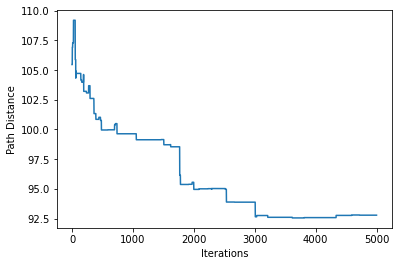

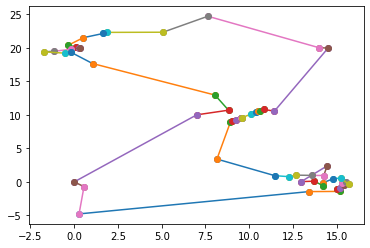

In [12]:
sa.plot_iter()
sa.plot_tsp()

Temperature Constant:  50
Temperature Probability:  0.5
Paths/iterations :  1000
Minimum path:  92.52594827274287
Init path:  105.4616464867548
Improvement:  12.26578442963771 %
Best path:  [56, 44, 54, 51, 27, 28, 25, 22, 21, 29, 26, 30, 23, 24, 31, 20, 52, 49, 46, 48, 38, 47, 32, 39, 40, 37, 43, 35, 33, 34, 36, 41, 42, 50, 0, 8, 6, 9, 19, 2, 3, 10, 14, 16, 5, 11, 17, 15, 4, 1, 7, 12, 18, 13, 45, 55, 53]


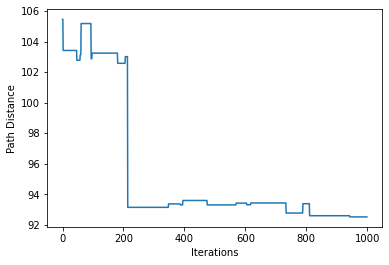

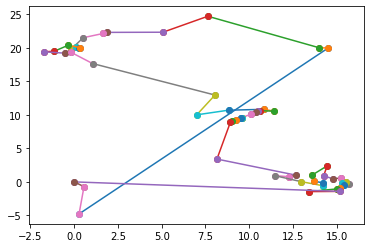

In [13]:
path = []
minimum = 10000000


sa2 = sim_anneal(coor, 1000, 50, 0.5)
sa2.anneal()
path.append(sa2.min_path)

sa2.plot_iter()
sa2.plot_tsp()


Temperature Constant:  20
Temperature Probability:  0.2
Paths/iterations :  1000
Minimum path:  105.4616464867548
Init path:  105.4616464867548
Improvement:  0.0 %
Best path:  [6, 10, 16, 5, 11, 17, 15, 4, 1, 7, 12, 19, 18, 13, 14, 2, 3, 9, 0, 8, 56, 44, 54, 51, 27, 28, 25, 24, 23, 30, 26, 29, 21, 22, 31, 20, 52, 49, 46, 48, 47, 38, 32, 39, 40, 37, 41, 36, 43, 33, 35, 34, 42, 50, 53, 55, 45]


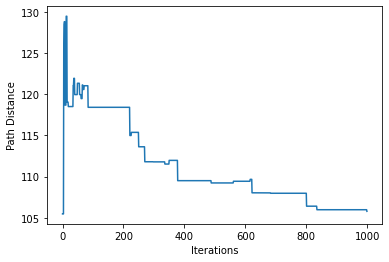

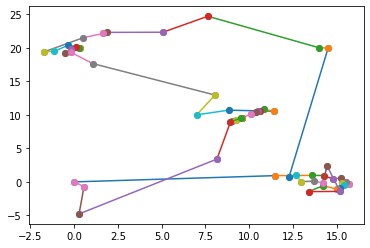

In [14]:
sa3 = sim_anneal(coor, 1000, 20, 0.2)
sa3.anneal()
path.append(sa3.min_path)

sa3.plot_iter()
sa3.plot_tsp()

Temperature Constant:  70
Temperature Probability:  0.2
Paths/iterations :  1000
Minimum path:  92.08127295274329
Init path:  105.4616464867548
Improvement:  12.687430909484224 %
Best path:  [56, 44, 54, 51, 27, 28, 25, 24, 23, 30, 26, 21, 29, 22, 31, 20, 52, 49, 46, 48, 36, 41, 42, 34, 43, 33, 35, 37, 40, 39, 32, 38, 47, 10, 14, 0, 8, 9, 3, 16, 5, 11, 4, 15, 17, 12, 7, 1, 2, 19, 13, 18, 6, 50, 45, 55, 53]


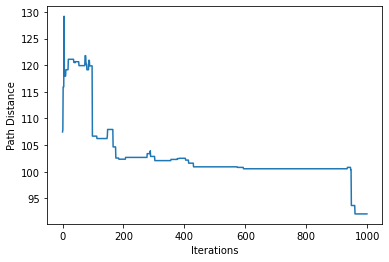

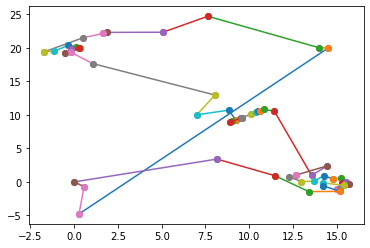

In [15]:
sa3a = sim_anneal(coor, 1000, 70, 0.2)
sa3a.anneal()
path.append(sa3a.min_path)

sa3a.plot_iter()
sa3a.plot_tsp()

Temperature Constant:  20
Temperature Probability:  0.8
Paths/iterations :  1000
Minimum path:  89.89882353139981
Init path:  105.4616464867548
Improvement:  14.756855666300982 %
Best path:  [56, 44, 54, 51, 27, 28, 25, 30, 21, 26, 29, 22, 23, 24, 31, 20, 52, 49, 46, 48, 47, 38, 32, 39, 40, 37, 33, 35, 34, 43, 36, 41, 42, 50, 6, 8, 18, 13, 2, 19, 12, 7, 1, 4, 15, 17, 11, 5, 10, 14, 16, 3, 9, 0, 45, 55, 53]


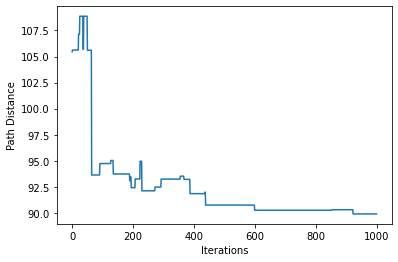

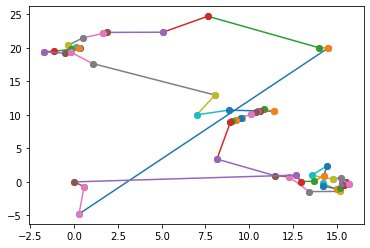

In [16]:
sa4 = sim_anneal(coor, 1000, 20, 0.8)
sa4.anneal()
path.append(sa4.min_path)

sa4.plot_iter()
sa4.plot_tsp()

Temperature Constant:  70
Temperature Probability:  0.8
Paths/iterations :  1000
Minimum path:  95.48243763567021
Init path:  105.4616464867548
Improvement:  9.46240570247299 %
Best path:  [56, 44, 54, 51, 27, 28, 25, 30, 29, 26, 22, 21, 23, 24, 31, 20, 52, 49, 38, 32, 39, 47, 34, 46, 48, 40, 37, 33, 35, 43, 36, 41, 42, 0, 9, 3, 2, 19, 14, 10, 16, 5, 11, 4, 15, 7, 17, 1, 12, 13, 18, 6, 8, 50, 45, 55, 53]


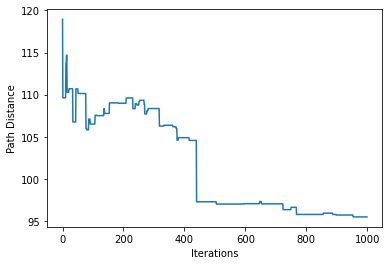

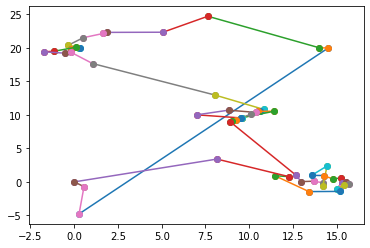

In [17]:
sa4a = sim_anneal(coor, 1000, 70, 0.8)
sa4a.anneal()
path.append(sa4a.min_path)

sa4a.plot_iter()
sa4a.plot_tsp()

Minimum distance of paths found in order: 
92.52594827274287
105.4616464867548
92.08127295274329
89.89882353139981
95.48243763567021
Minimum of array of minimum distances found:  89.89882353139981


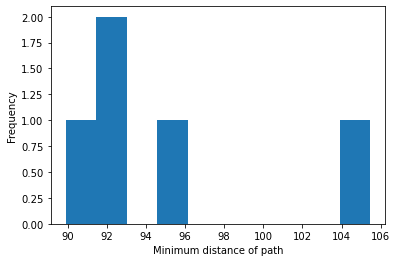

In [18]:
print("Minimum distance of paths found in order: ")
for p in path:
    if minimum > p:
        minimum = p
    print(p)

print("Minimum of array of minimum distances found: ", minimum)

plt.hist(path, stacked = True)
plt.xlabel("Minimum distance of path")
plt.ylabel("Frequency")
plt.show()

Because I set up my annealing code to sample random numbers ->
    
    #sample a random number (from 0-1) and compare to p_accept.
                
                accept = np.random.choice([True, False], p = [p_accept, 1-p_accept])
                
                if accept: #if number is smaller and if we are larger, we don't move
                
to find the probability to accept, my results change quite frequently despite what c and p parameters I alter.